In [9]:
import pandas as pd 
import numpy as np 
import random
from tqdm import tqdm 
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import warnings;
warnings.filterwarnings('ignore')

# InvoiceNo: Invoice number. a unique number assigned to each transaction
# StockCode: Product/item code. a unique number assigned to each distinct product
# Description: Product description
# Quantity: The quantities of each product per transaction
# InvoiceDate: Invoice Date and time. The day and time when each transaction was generated
# CustomerID: Customer number. a unique number assigned to each customer


In [11]:
data = pd.read_excel("Online_Retail.xlsx")

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [14]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
data.dropna(inplace = True)

In [17]:
data['StockCode'] = data['StockCode'].astype(str)

In [23]:
customers = data['CustomerID'].unique().tolist()
len(customer)

4372

In [26]:
random.shuffle(customers)
customers_train = [customers[i] for i in range(round(0.9*len(customers)))]
train_data = data[data['CustomerID'].isin(customers_train)]
validation_data = data[~data['CustomerID'].isin(customers_train)]

In [30]:
purchases_train = []
for i in tqdm(customers_train):
    temp = train_data[train_data["CustomerID"] == i]["StockCode"].tolist()
    purchases_train.append(temp)
    

100%|██████████| 3935/3935 [00:12<00:00, 315.43it/s]


In [37]:
purchases_valid = []
for i in tqdm(validation_data['CustomerID'].unique()):
    temp = validation_data[validation_data["CustomerID"] == i]['StockCode'].tolist()
    purchases_valid.append(temp)

100%|██████████| 437/437 [00:00<00:00, 554.59it/s]


In [50]:
model = Word2Vec(window = 10, sg = 1, hs = 0, negative = 10, alpha = 0.03, min_alpha = 0.0007, seed = 14)
model.build_vocab(purchases_train, progress_per = 20)
model.train(purchases_train, total_examples = model.corpus_count, epochs = 10, report_delay = 1)
model.init_sims(replace=True)

(3619629, 3657870)

In [134]:
x = model[model.wv.vocab]
x.shape
model

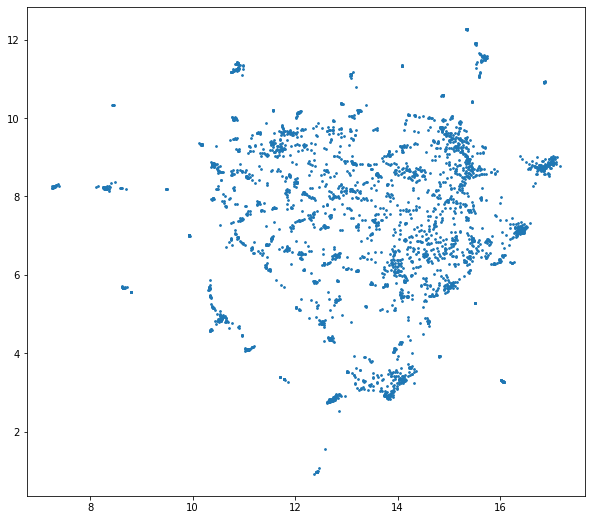

In [65]:
import umap.umap_ as umap
cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(x)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')


In [82]:
products = train_data[["StockCode", "Description"]]
products.drop_duplicates(inplace=True, subset='StockCode') 


In [85]:
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()


In [88]:
def similar_products(v, n = 6):
    ms = model.similar_by_vector(v, topn = n+1)[1:]
    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]], j[1])
        new_ms.append(pair)
    return new_ms

In [130]:
similar_products(model['90019A'])
# model['90019A']

array([-0.05784698, -0.12331945,  0.08370808, -0.07037147,  0.03252679,
       -0.02614726,  0.02627082, -0.11980613,  0.08458161, -0.01725427,
       -0.15483275, -0.04568568, -0.04865374,  0.06883417,  0.05560495,
       -0.02439663,  0.00410839, -0.07339135,  0.04924689,  0.13914172,
       -0.08815187,  0.03912179,  0.0479543 , -0.15398175,  0.01020025,
       -0.03638818,  0.08998601, -0.15197146,  0.16541994, -0.05850579,
        0.11258107, -0.06911036, -0.02515036,  0.01280326,  0.10222507,
        0.06381164,  0.23864654, -0.1787615 ,  0.1299531 ,  0.10983936,
        0.0385103 ,  0.12438209, -0.0502037 , -0.12850776, -0.18513684,
       -0.04469657,  0.08809802,  0.05605041, -0.05428111,  0.03728461,
        0.06597354, -0.05227885, -0.06734088,  0.06513213, -0.10429205,
        0.02207834,  0.18676816,  0.03400455,  0.11889726,  0.04194148,
       -0.0244681 , -0.09630985,  0.00933323, -0.00365607, -0.0734122 ,
       -0.14941506, -0.12358165, -0.16166523,  0.01844339,  0.06

In [97]:
ms = model.similar_by_vector(model['90019A'], topn = 7+1)[1:]
for j in ms:
    print(products_dict[j[0]], j[1])

['SILVER M.O.P ORBIT DROP EARRINGS'] 0.8372805714607239
['5 STRAND GLASS NECKLACE CRYSTAL'] 0.8184465169906616
['RASPBERRY ANT COPPER FLOWER NECKLAC'] 0.7926996350288391
['AMBER DROP EARRINGS W LONG BEADS'] 0.7834461331367493
['GOLD/M.O.P PENDANT ORBIT NECKLACE'] 0.7825460433959961
['SILVER LARIAT BLACK STONE EARRINGS'] 0.7734010815620422
['DROP DIAMANTE EARRINGS PURPLE'] 0.7678710222244263


In [129]:
# data[data['StockCode'] == j for j in purchases_valid[0]]
purchases_valid[0]]
for i in range(len(data['StockCode'])):
#     print(data['StockCode'].iloc[i])
    if data['StockCode'].iloc[i] in purchases_valid[0]:
        print(data['StockCode'].iloc[i], data['CustomerID'].iloc[i])
        
    

82484 18074.0
84755 18074.0
22464 18074.0
21324 18074.0
22457 18074.0
22469 18074.0
22470 18074.0
22224 18074.0
21340 18074.0
22189 18074.0
22427 18074.0
22428 18074.0
22424 18074.0
22464 16250.0
22469 16250.0
22428 15862.0
22469 16218.0
22470 12838.0
22469 12838.0
22189 13694.0
22470 14729.0
22469 14729.0
22469 14729.0
22428 14078.0
21324 14078.0
22457 14594.0
22470 14594.0
22469 14594.0
82484 17841.0
22470 17841.0
22428 16274.0
21340 16274.0
22457 14496.0
22469 16539.0
84755 17025.0
21340 13065.0
22457 13065.0
22189 14741.0
22457 14741.0
22457 17732.0
84755 15601.0
22457 18041.0
22469 16244.0
22469 15260.0
84755 15923.0
22457 15363.0
22457 13117.0
22470 16916.0
22469 16916.0
84755 16916.0
22470 14449.0
82484 16781.0
22469 17567.0
22427 17838.0
22424 17838.0
22428 17838.0
22427 13402.0
22464 18239.0
22470 14395.0
22470 16150.0
22469 16150.0
22469 14573.0
22427 14573.0
22424 14573.0
22470 14573.0
22469 17884.0
22469 14083.0
22469 17787.0
22457 17787.0
22470 14723.0
22470 16140.0
22470 

22424 14215.0
21340 15916.0
22457 18106.0
22428 18106.0
22189 18106.0
22470 18106.0
22457 15033.0
22457 15570.0
22457 14329.0
22470 14329.0
22469 14329.0
22469 16206.0
22470 16206.0
22224 13782.0
22464 15046.0
22469 15046.0
21340 15046.0
22470 17841.0
22189 13048.0
22457 13048.0
22469 13634.0
22470 13634.0
22469 16059.0
22470 16059.0
21324 16059.0
22469 18069.0
22470 18069.0
22457 17064.0
22457 17064.0
22470 17609.0
22224 17609.0
22469 17609.0
22457 12872.0
22457 14976.0
22457 15296.0
22424 17690.0
22424 17690.0
22428 17690.0
22469 13001.0
22464 13982.0
22470 14525.0
22469 14525.0
22464 14525.0
22469 13769.0
22470 13769.0
22189 13769.0
22470 13209.0
84755 14238.0
22457 13983.0
21340 13929.0
22457 14657.0
22469 13246.0
82484 13089.0
22470 13859.0
82484 13859.0
22470 18212.0
22469 18212.0
22457 18212.0
22464 14292.0
21340 16033.0
84755 15513.0
22469 14242.0
22189 14242.0
22457 12748.0
82484 14696.0
22427 15395.0
82484 18109.0
22469 18109.0
22457 15023.0
22469 15023.0
22457 15023.0
22469 

84755 15785.0
22189 16556.0
22427 16556.0
82484 18138.0
22427 13012.0
82484 13012.0
22424 16713.0
82484 14911.0
22457 16726.0
22470 16726.0
84755 13951.0
21340 16566.0
82484 13246.0
22428 17811.0
22457 17811.0
22470 14162.0
22469 17214.0
22469 13301.0
22424 17838.0
22469 16931.0
22470 16931.0
22470 12988.0
22470 12988.0
22424 14502.0
22464 14502.0
22224 14502.0
22427 14502.0
22457 15129.0
22424 14229.0
22427 14229.0
22469 18155.0
22427 18155.0
22427 17757.0
22457 12766.0
22470 16980.0
22424 14639.0
22224 12365.0
22189 16014.0
82484 16638.0
84755 17512.0
22470 15722.0
82484 14895.0
22427 14895.0
22424 14895.0
22457 13113.0
22470 16045.0
82484 17511.0
22470 16573.0
22469 16573.0
22457 17841.0
22470 18196.0
22469 18196.0
22470 13184.0
22427 15397.0
22469 13453.0
22427 14978.0
22424 13865.0
22457 13089.0
22457 13993.0
22457 14289.0
22424 18172.0
21340 13854.0
21340 16208.0
22457 16208.0
84755 16208.0
22470 16208.0
22469 16208.0
22457 17504.0
22470 17504.0
22469 17504.0
22469 15932.0
82484 

22427 17337.0
22424 17337.0
21340 17337.0
22457 14023.0
84755 15874.0
82484 17648.0
22424 17648.0
22427 17648.0
22424 15039.0
82484 15493.0
84755 15223.0
84755 15223.0
22427 17419.0
22457 13294.0
84755 13668.0
22427 13668.0
22424 13015.0
21340 17848.0
82484 16586.0
21340 13013.0
84755 13018.0
22457 15572.0
22427 15572.0
22457 15674.0
22457 15674.0
22464 16906.0
22189 14546.0
22457 14535.0
84755 17492.0
22224 17409.0
22424 17409.0
22424 14407.0
22427 14220.0
22457 14403.0
22457 14701.0
22427 14239.0
22427 15235.0
22457 15719.0
22427 16043.0
22224 13752.0
22457 13752.0
22189 14446.0
21324 17790.0
22464 17790.0
82484 17790.0
21340 14903.0
22224 14903.0
22427 15916.0
84755 16469.0
84755 13005.0
22469 14527.0
22457 14395.0
84755 14395.0
22427 16261.0
22189 13230.0
82484 13230.0
22189 14619.0
22189 13362.0
22427 13362.0
22457 16643.0
22464 14246.0
22457 14246.0
22427 16133.0
22427 15189.0
22427 15119.0
82484 14217.0
22427 14217.0
22427 15109.0
21340 13911.0
22427 16623.0
22464 16010.0
21340 

22470 17505.0
22464 17505.0
84755 13756.0
22189 18260.0
22470 16775.0
22469 16775.0
84755 14407.0
22224 15811.0
22470 16553.0
22457 14565.0
22464 13258.0
22457 18097.0
22457 14911.0
22224 17389.0
22457 15311.0
22469 14463.0
22224 17338.0
22470 16987.0
22469 16987.0
84755 16570.0
22427 12481.0
22424 14895.0
82484 14895.0
22470 13468.0
22469 13468.0
84755 16175.0
22427 17245.0
82484 14442.0
21340 14442.0
22457 12957.0
22224 12957.0
22470 17346.0
22469 12897.0
82484 17675.0
22457 18075.0
22457 16813.0
82484 13050.0
22469 13050.0
22469 14733.0
82484 15791.0
22464 13762.0
22427 12601.0
22470 15648.0
22469 15648.0
22424 13405.0
84755 17560.0
22469 17560.0
22469 15271.0
22470 15271.0
22470 14911.0
22469 14911.0
22427 14911.0
21340 14911.0
22424 17671.0
22464 16554.0
22457 15122.0
82484 18109.0
22457 18109.0
22469 18109.0
22427 18225.0
22470 16146.0
22469 14334.0
82484 14334.0
22457 15220.0
22427 13308.0
22457 13243.0
22427 15410.0
22457 16497.0
22469 16497.0
22427 13824.0
22469 18198.0
84755 

22224 17716.0
22189 17716.0
22457 17716.0
22469 17716.0
22470 17716.0
84755 14222.0
22464 16739.0
84755 16739.0
22189 12484.0
84755 12484.0
22457 14321.0
82484 15044.0
82484 16942.0
22424 16814.0
22469 14243.0
22464 14243.0
22469 17463.0
22470 17463.0
84755 14755.0
22427 16852.0
84755 14849.0
82484 17416.0
22469 14062.0
22424 16359.0
22428 14765.0
22428 17841.0
22424 17841.0
82484 14911.0
22464 16779.0
22189 18118.0
82484 15021.0
22427 17426.0
22457 16869.0
21340 16869.0
22427 15311.0
22457 17932.0
22470 13618.0
84755 17769.0
82484 13089.0
21340 18109.0
22470 18109.0
84755 17562.0
22224 12421.0
82484 15373.0
22469 13568.0
22457 14820.0
22427 14820.0
22469 16493.0
22427 13240.0
84755 15700.0
84755 17001.0
22427 17001.0
22224 13524.0
22457 12837.0
21340 12837.0
22427 14911.0
22469 15747.0
84755 15016.0
22189 18260.0
22457 13815.0
82484 16713.0
21340 12904.0
22469 15825.0
82484 17428.0
21340 14796.0
21340 16839.0
22470 17463.0
82484 14397.0
22464 15998.0
22427 15507.0
22189 15507.0
22424 

22470 14692.0
22470 14232.0
22189 12836.0
82484 12836.0
22424 13110.0
22457 17734.0
82484 15281.0
84755 16592.0
84755 15513.0
82484 15513.0
22427 15513.0
82484 16942.0
22469 16942.0
22424 13668.0
22470 15203.0
84755 16019.0
84755 17160.0
22457 16133.0
22469 15152.0
22464 16750.0
22457 13194.0
84755 13999.0
84755 13458.0
22427 14527.0
22424 14527.0
22457 14911.0
22424 17841.0
22464 16609.0
22470 15624.0
22427 14534.0
22470 14534.0
22469 14534.0
22457 14307.0
84755 15105.0
22469 13534.0
22457 16133.0
22464 16558.0
22464 16076.0
22464 15023.0
22470 15023.0
22470 14898.0
22469 14898.0
21340 14898.0
22189 14911.0
22428 17965.0
22424 17965.0
22457 15939.0
22469 15746.0
82484 18102.0
22189 18102.0
22469 17071.0
22469 17450.0
22470 17450.0
22427 15189.0
22457 15245.0
82484 13148.0
84755 15974.0
82484 15974.0
22470 17790.0
82484 14499.0
22457 14499.0
22457 12921.0
22189 12839.0
22457 12839.0
22457 14854.0
22470 16775.0
22469 16775.0
22424 16775.0
22427 16775.0
21340 16839.0
84755 16813.0
22470 

22470 17870.0
82484 13823.0
22424 15039.0
22470 16515.0
22457 18118.0
84755 12748.0
22428 14711.0
22470 14711.0
82484 14180.0
22424 14180.0
22469 18109.0
22470 14824.0
22469 14824.0
22470 16910.0
22469 16910.0
22457 16910.0
21340 14895.0
22424 14895.0
82484 16899.0
22457 15605.0
22457 14837.0
84755 12635.0
22224 15035.0
82484 15636.0
22469 13426.0
22189 13527.0
22470 13527.0
22457 13527.0
22469 13527.0
22469 13124.0
22427 13372.0
84755 18255.0
22427 12647.0
22189 13813.0
22464 16523.0
22469 14487.0
22464 14487.0
22470 13884.0
22469 16549.0
22457 16796.0
22464 16796.0
22424 12883.0
22457 12965.0
82484 12965.0
84755 12965.0
22469 12965.0
22427 12965.0
22469 13381.0
22457 16794.0
22470 18215.0
22457 16474.0
22457 16474.0
22469 12997.0
22470 12997.0
22424 15865.0
22427 13375.0
22469 16209.0
21340 16211.0
22469 13650.0
22189 13650.0
22189 16141.0
22470 17139.0
22469 14997.0
22424 12924.0
22457 13064.0
21340 16839.0
22470 17090.0
22424 17090.0
22189 17090.0
21340 13854.0
22424 17719.0
22469 

22427 12856.0
22457 12856.0
22470 13995.0
22469 13995.0
22189 17451.0
82484 14397.0
22469 15453.0
22457 14290.0
22470 14595.0
22470 16206.0
22469 16206.0
22457 14910.0
22469 12940.0
82484 12940.0
22470 15440.0
21340 13878.0
22427 16934.0
22470 15994.0
22469 16934.0
22470 16934.0
22469 16466.0
22189 18122.0
22470 18122.0
22224 14088.0
22470 14547.0
22457 15113.0
22457 15113.0
22427 17183.0
22424 17183.0
22470 13956.0
21340 13956.0
22427 13956.0
22469 16987.0
22457 14741.0
22469 14741.0
82484 12473.0
22457 17520.0
22427 17520.0
22457 14911.0
22469 14911.0
22457 17527.0
21340 17858.0
82484 17858.0
22424 17858.0
22428 17858.0
22427 17858.0
22189 16412.0
22470 16412.0
22469 16412.0
22189 16412.0
22424 15066.0
22457 14096.0
22469 14096.0
22470 14096.0
82484 17049.0
22469 17049.0
22470 17049.0
22470 17785.0
22424 13546.0
22457 17612.0
22469 14841.0
22470 14841.0
22469 17841.0
22189 14422.0
22464 14422.0
22470 13110.0
22470 15598.0
22457 15678.0
22457 13594.0
22464 14298.0
84755 14298.0
22457 

22189 14530.0
22469 12938.0
22457 14684.0
22189 15572.0
22464 18117.0
22457 14910.0
22470 13447.0
22470 17566.0
22428 17566.0
21340 15993.0
22189 15953.0
22470 14667.0
22464 16504.0
22189 14096.0
22457 14096.0
84755 13089.0
82484 13089.0
22457 15009.0
22189 15009.0
22470 15628.0
22457 12839.0
22469 12883.0
22470 12883.0
22457 17974.0
22457 17974.0
22457 13950.0
22464 14666.0
22457 13066.0
82484 13066.0
22470 17659.0
84755 18181.0
84755 18181.0
21340 13854.0
82484 14217.0
22457 14217.0
22457 13894.0
84755 15687.0
22424 15687.0
22457 17841.0
22469 17841.0
21340 18246.0
22469 16855.0
22469 16916.0
22469 13558.0
22470 16717.0
22457 16717.0
22469 15900.0
82484 14527.0
22470 13926.0
22464 13258.0
22424 13939.0
22469 14898.0
22424 16713.0
22457 12748.0
22457 12748.0
22424 13012.0
82484 13012.0
22470 15432.0
22457 15432.0
22469 14673.0
22189 12477.0
22457 17419.0
22457 16869.0
22469 17095.0
22470 13668.0
22469 13668.0
21340 14704.0
22470 17797.0
22469 17397.0
82484 17397.0
22457 15189.0
22470 

In [108]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model[i])
        except KeyError:
            continue
    return np.mean(product_vec, axis = 0)

In [112]:
similar_products(aggregate_vectors(purchases_valid[0]))

[(['ENAMEL FLOWER JUG CREAM'], 0.7345626354217529),
 (['WHITE HANGING HEART T-LIGHT HOLDER'], 0.7342097163200378),
 (['CREAM WALL PLANTER HEART SHAPED'], 0.7216182947158813),
 (['FINE WICKER HEART '], 0.719127357006073),
 (['NATURAL SLATE HEART CHALKBOARD '], 0.7155941724777222),
 (['HEART OF WICKER SMALL'], 0.7104722261428833)]

In [115]:
similar_products(aggregate_vectors(purchases_valid[0][-10:]))

[(['HEART OF WICKER LARGE'], 0.7334840297698975),
 (['HEART OF WICKER SMALL'], 0.7315232753753662),
 (['FINE WICKER HEART '], 0.7205981016159058),
 (['CREAM WALL PLANTER HEART SHAPED'], 0.7181346416473389),
 (['WHITE HANGING HEART T-LIGHT HOLDER'], 0.7094945907592773),
 (['CREAM HEART CARD HOLDER'], 0.7075662612915039)]

In [126]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [159]:
Corpus = 'He is not lazy. He is intelligent. He is smart'.split()
matrix = dict(zip(set(Corpus),[0 for x in range(0,len(set(Corpus)))]))
matrix
for i in matrix:
    for j in Corpus:
        if i in j:
            matrix[i] += 1
        

In [161]:
matrix

{'is': 3, 'intelligent.': 1, 'lazy.': 1, 'not': 1, 'smart': 1, 'He': 3}

In [230]:
word = [[0,1,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0], [0,0,0,0,0,0,0,0,1,0]]

In [199]:
data = []
temp = ''
count = 1
for i in range(0,10):
    for j in range(count, count+4):
        temp = temp + ' '+ str(j) 
    data.append(temp.split())
    count = count + 4
    temp = ''


In [216]:
data = np.array(data,  dtype='float64')

In [234]:

for i in word:
    print(np.dot(i, data, out = None ))

[5. 6. 7. 8.]
[17. 18. 19. 20.]
[33. 34. 35. 36.]


In [237]:
# https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
# analyticsvidhya.com/blog/2020/07/neural-networks-from-scratch-in-python-and-r/